## Workflow 
###1. Dadata wrangling 
###2. EDA 
###3. Applying appropriate machine learning to solve the problem 

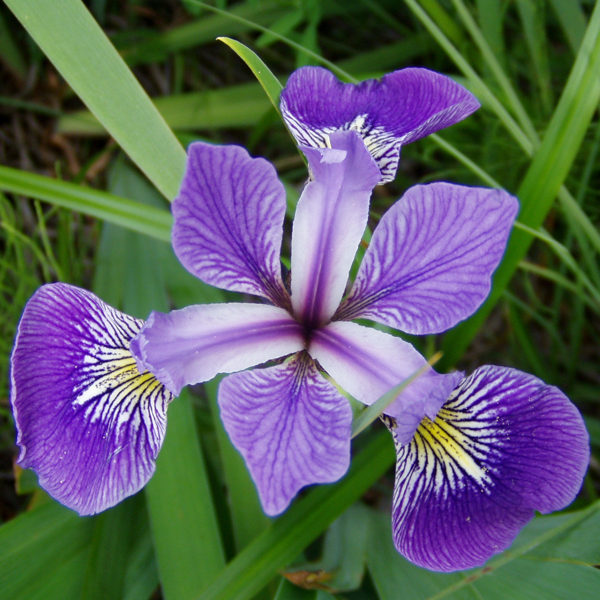

In [170]:
import pandas as pd ## Manupulating numberical tables and data 
import numpy as np ## Mathematical calculations  
import matplotlib.pyplot as plt ## Visualisation 
import seaborn as sns ## Visualisation of data in the form of bar chart , piechart etc 

In [171]:
df=pd.read_csv("/content/IRIS.csv") ## read the csv file 

In [172]:
df.head() ## find the top data 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [173]:
print(df.shape) # find the shape of data 

(150, 5)


In [174]:
df.isnull().sum() ## Check missing values 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [175]:
df.info() ## Information about the data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [176]:
df.describe() ## Description about the data 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [177]:
df['species'].value_counts() ## Count the value of each species  

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [178]:
print("the number of the data duplicated",df.duplicated().sum()) ## Find the duplicate values 

the number of the data duplicated 3


#### Some Exploratry Data Analysis with Iris 

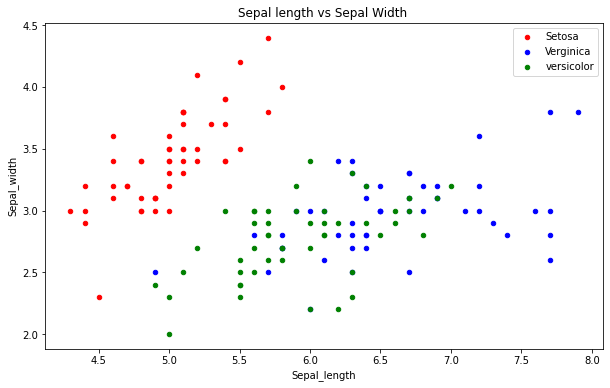

In [179]:

fig = df[df.species=='Iris-setosa'].plot(kind="scatter",x="sepal_length",y="sepal_width",color='red',label='Setosa')
df[df.species=="Iris-virginica"].plot(kind="scatter",x="sepal_length",y="sepal_width",color='blue',label='Verginica',ax=fig)
df[df.species=="Iris-versicolor"].plot(kind="scatter",x="sepal_length",y="sepal_width",color='green',label='versicolor',ax=fig)
fig.set_xlabel("Sepal_length")
fig.set_ylabel("Sepal_width")
fig.set_title("Sepal length vs Sepal Width ")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#### Above graph shows relationship between Sepal width  and Sepal  length

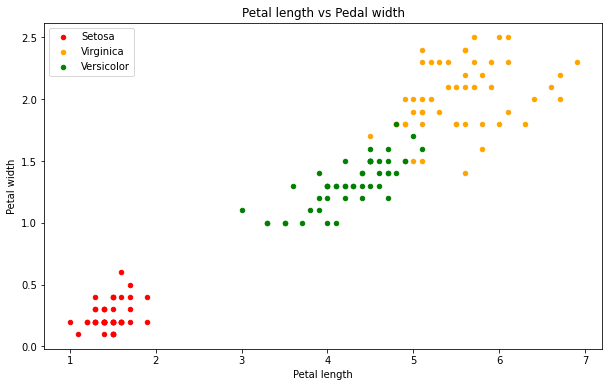

In [181]:
fig=df[df.species=="Iris-setosa"].plot(kind="scatter",x="petal_length",y="petal_width", color="red",label="Setosa")
df[df.species=="Iris-virginica"].plot(kind="scatter",x="petal_length",y="petal_width", color="orange",label="Virginica",ax=fig)
df[df.species=="Iris-versicolor"].plot(kind="scatter",x="petal_length",y="petal_width", color="green",label="Versicolor",ax=fig)
fig.set_xlabel("Petal length")
fig.set_ylabel("Petal width")
fig.set_title("Petal length vs Pedal width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


#### Above graph shows relationship between Petal width and Petal length

#### In the above graph the relationship between the Petal width and the Petal length have better cluster division compare to above sepal length and width 

#### See the width and length distrubted 

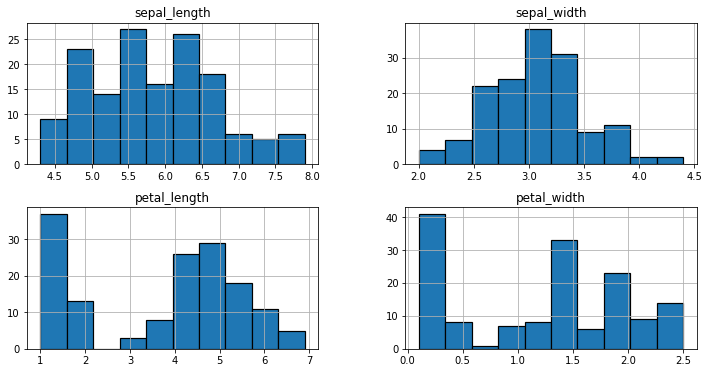

In [182]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

#### How length and width vary according to the species 

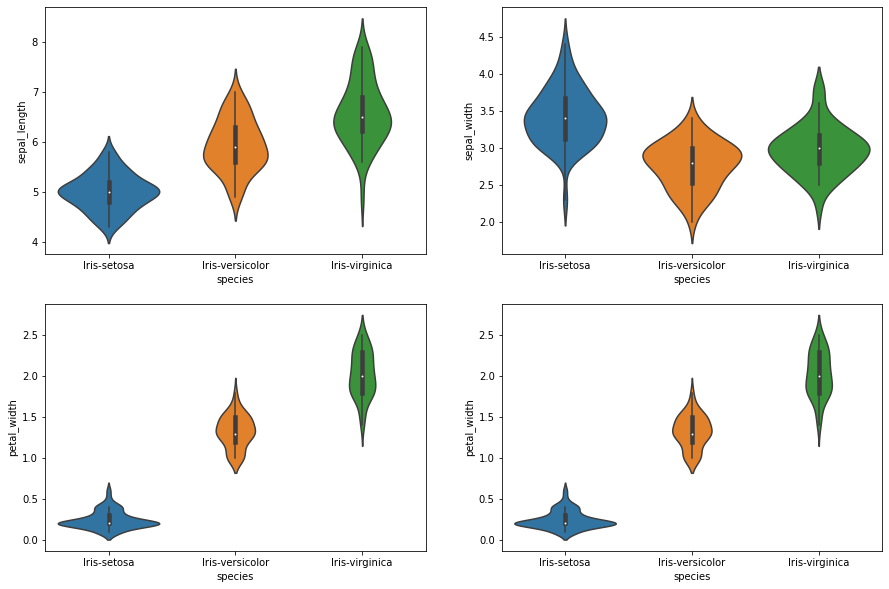

In [183]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1) ## subplot(nrows,ncols,index)
sns.violinplot(x="species",y="sepal_length", data=df)
plt.subplot(2,2,2)
sns.violinplot(x="species",y="sepal_width", data=df)
plt.subplot(2,2,3)
sns.violinplot(x="species",y="petal_width",data=df)
plt.subplot(2,2,4)
sns.violinplot(x="species",y="petal_width",data=df)


### Problem is classification ,now we use the classification algorithms to build the model.

#####  Classification: samples belong to two and more classes we want to learn from already labeled  data how to predict the class of unlabel data 

In [193]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [194]:
df.shape

(150, 5)

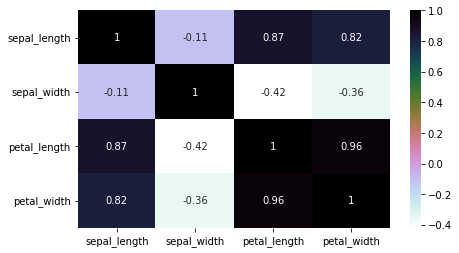

In [199]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

###-----Observation-----
The corelation between sepal & petal length VS length , width VS width  and where as sepal & petal length VS width is low.  

#### Steps to be taken when applying an algorithm 
#####1. Split the data in to training and testing dataset.
#####2. Select the algorithm based on the problem(classification or regression) whatever required. 
#####3. Then pass the training dataset to the algorithm to train it , here we use **.fit()** method.
#####4.Then pass the testing data to the trained algorithm to predict the outcome. We use the **.predict()** method.
#####5.We then check the accuracy by passing the predicted outcome and the actual output to the model.

### Taking the training dataset

#### Splitting the data into training and testing Dataset

In [212]:
train , test= train_test_split(df,test_size=0.3) # Split the data into train and test 70% for training and 30% for test
print(train.shape)
print(test.shape) 

(105, 5)
(45, 5)


In [213]:
train_X = train[['sepal_length','sepal_width','petal_width','petal_length']] # taking the training dataset
train_y=df.species  #output of our training data 
test_X=test[['sepal_length','sepal_width','petal_width','petal_length']]
test_y=test.species #taking the test dataset 



In [214]:
train_X.head(2)


,sepal_length,sepal_width,petal_width,petal_length
5,5.4,3.9,0.4,1.7
143,6.8,3.2,2.3,5.9


In [215]:
test_X.head(2)

,sepal_length,sepal_width,petal_width,petal_length
127,6.1,3.0,1.8,4.9
130,7.4,2.8,1.9,6.1


In [217]:
train_y.head() # Output of the training data

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object